# project prediksi umur abalone menggunakan kondisi pengukuran fisik

### keterangan dataset
- Sex 			: Male, Female, and I (infant)
- Length 		    : Panjang cangkang dalam milimeter
- Diameter 		: Diameter dalam milimeter
- Height 			: Tinggi termasuk daging dalam cangkang dalam milimeter
- Whole weight 	: Berat keseluruhan abalone dalam gram
- Shucked weight	: Berat daging abalone gram
- Viscera weight 	: Berat usus abalone setelah dikeringkan gram
- Shell weight 	: Berat cangkang setelah dikeringkan gram
- Rings 			: Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


berdasarkan summary statistic pada data kolom height(Tinggi termasuk daging dalam cangkang dalam milimeter)  memiliki minimum 0 sehingga sangat tidak memungkinkan tinggi abalon= 0, maka dari itu kita perlu menghapus height=0 karena kemungkinan height tidak dihitung dalam sample tersebut

In [6]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [7]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

disini saya menghapus 2 row pada dataset sehingga jumlah dataset berkurang

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


mengubah kolom sex menjadi kategorik

In [9]:
df['Age'] = df['Rings']+1.5 #Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


membuat kolom baru berisikan umur dari abalon pada kolom age 

C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


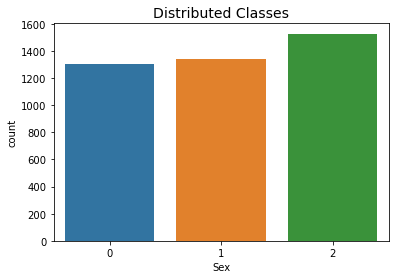

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot('Sex', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

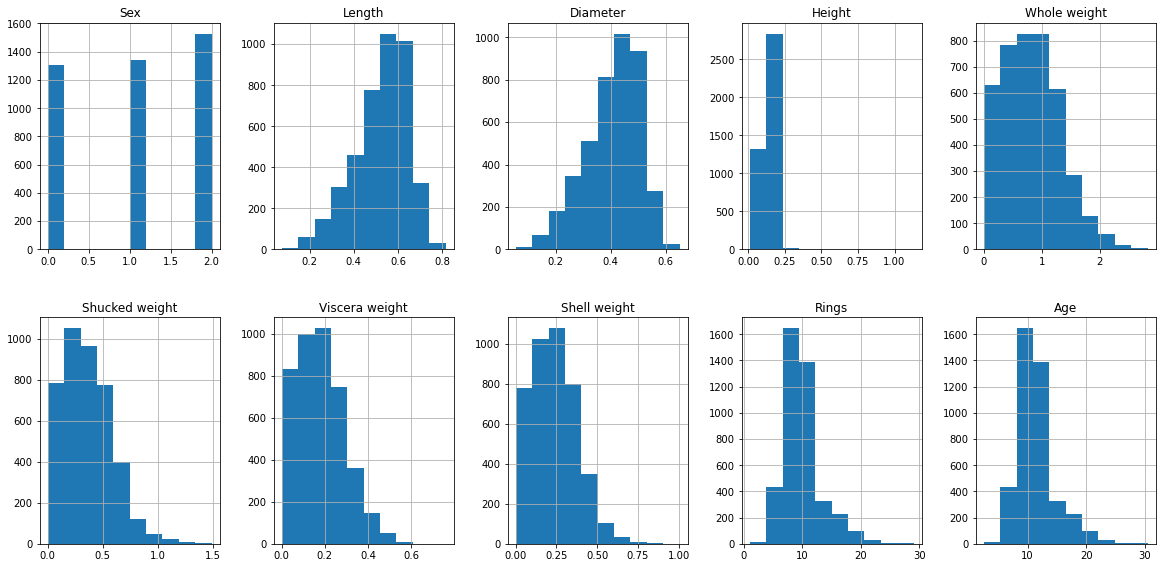

In [11]:
df.hist(figsize = (20,15), layout = (3,5))

berdasarkan histogram distribusi data cukup menyebar namum condong terlalu tinggi sehingga perlu dilakukan normalisasi

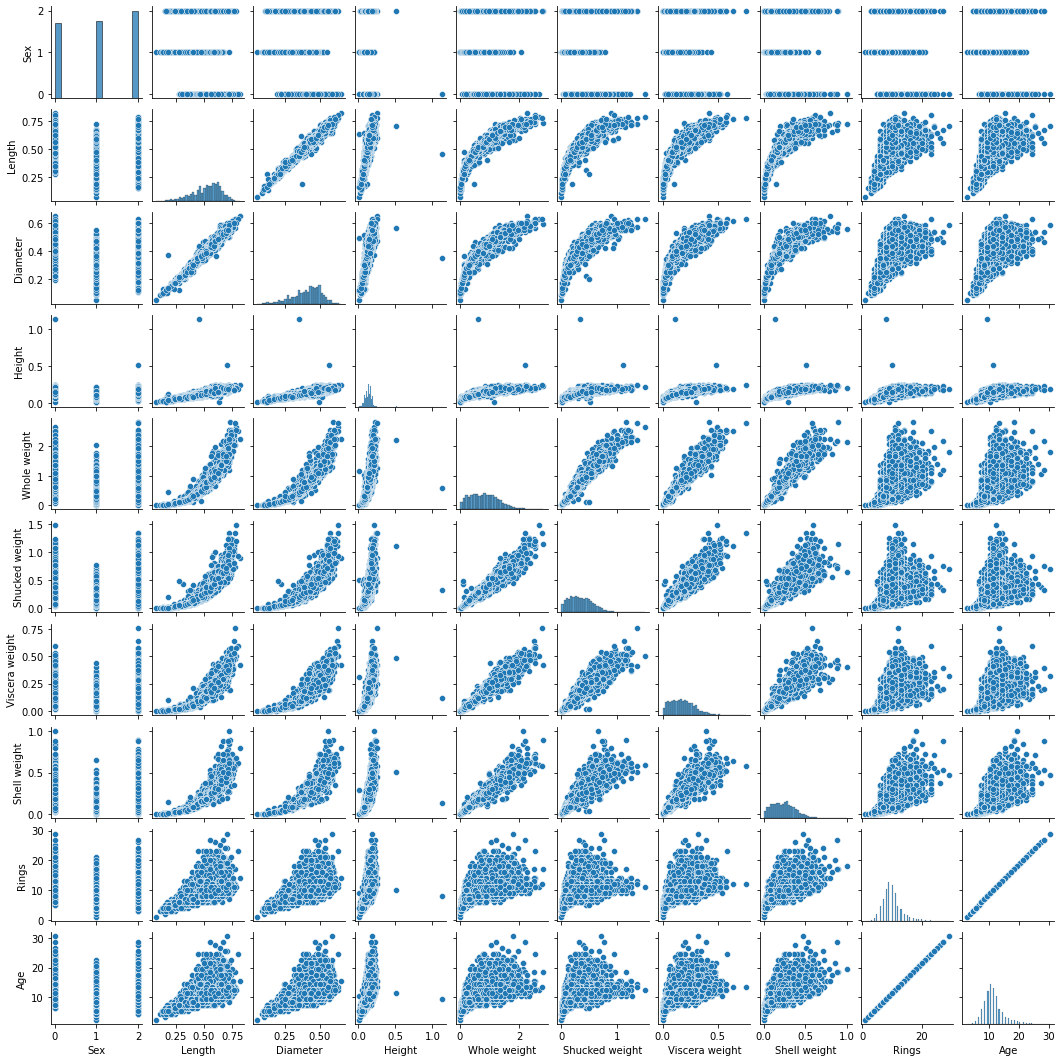

In [12]:
sns.pairplot(df, height=1.5)

In [13]:
df.skew().sort_values(ascending = False)

Height            3.166364
Rings             1.113754
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Sex              -0.098224
Diameter         -0.610182
Length           -0.640993
dtype: float64

rata rata kecondongan mendekati 0 untuk kurva distribusi normal, untuk kecondongan height tertinggi 3,166 , kemungkinan adanya outlier tinggi maka kita perlu memriksanya sebelum membentuk model

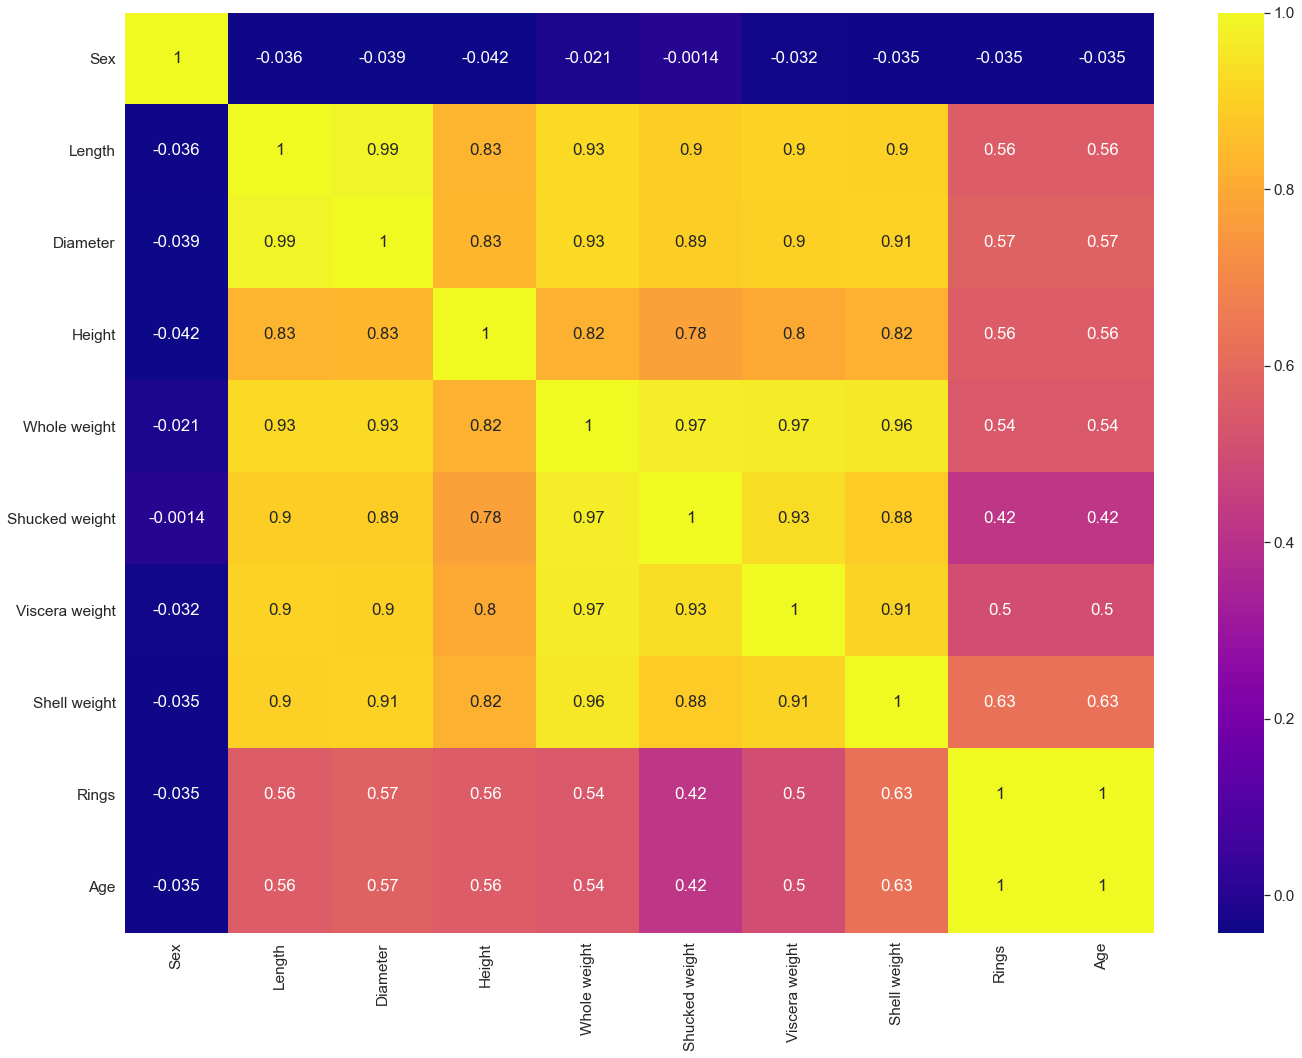

In [14]:
korelasi = df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
sns.heatmap(korelasi, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

Adanya korelasi yang tinggi antara Length dan Diameter, Korelasi tinggi antara shucked weight dan viscera weight sebesar 0.93 ,shucked weight dan Whole weight sebesar  0.97,viscera weight dan  Whole weight sebesar  0.97,  Shell weight dan  Whole weight sebesar 096

In [15]:
# Mencari Data Yang Masuk Outlier

label = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings","Age"]
outlier = df.drop(df.index)
for i in label:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier = outlier.append(df[(df[i]<lower_limit) | (df[i]>upper_limit)])

outlier

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
148,1,0.175,0.130,0.055,0.0315,0.0105,0.0065,0.0125,5,6.5
149,1,0.170,0.130,0.095,0.0300,0.0130,0.0080,0.0100,4,5.5
236,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,2.5
237,1,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,4.5
238,1,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,4.5
...,...,...,...,...,...,...,...,...,...,...
3929,0,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250,16,17.5
3930,0,0.670,0.535,0.185,1.5970,0.6275,0.3500,0.4700,21,22.5
3931,1,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.3000,17,18.5
3944,2,0.550,0.440,0.160,0.9910,0.3480,0.1680,0.3750,20,21.5


Text(0.5, 1.0, 'height vs sex')

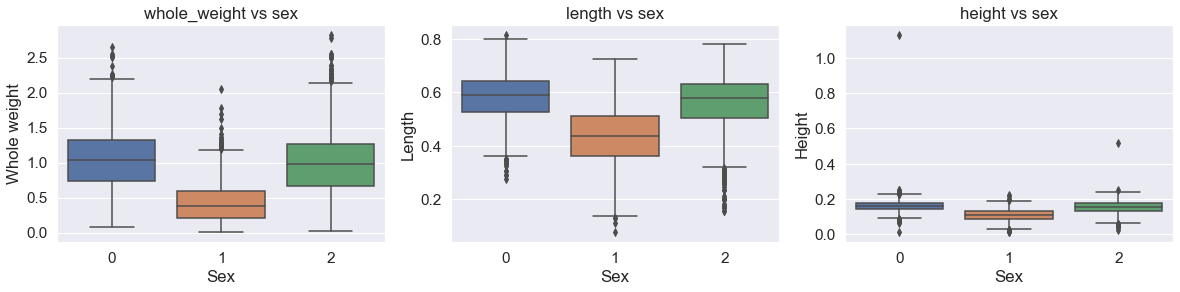

In [16]:
f, axes = plt.subplots(ncols = 3, figsize = (20,4))

sns.boxplot(x = 'Sex', y = 'Whole weight', data = df, ax = axes[0])
axes[0].set_title('whole_weight vs sex')

sns.boxplot(x = 'Sex', y = 'Length', data = df, ax = axes[1])
axes[1].set_title('length vs sex')

sns.boxplot(x = 'Sex', y = 'Height', data = df, ax = axes[2])
axes[2].set_title('height vs sex')

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [57]:
x = df.drop(['Age','Sex','Rings'], axis = 1)
y = df.Age

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))


0.5000498300496357


In [59]:

import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     664.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:49:14   Log-Likelihood:                -9245.8
No. Observations:                4175   AIC:                         1.851e+04
Df Residuals:                    4167   BIC:                         1.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4995      0.270     16.687      0.000       3.971       5.028
Length            -1.5500      1.825     -0.849      0.396      -5.128       2.028
Diameter          13.2884      2.238      5.937      0.000       8.901      17.676
Height            11.7681      1.557      7.558      0.000       8.715      14.821
Whole weight       9.1478      0.738     12.389      0.000       7.700      10.595
Shucked weight   -20.1260      0.827    -24.325      0.000     -21.748     -18.504
Viscera weight    -9.7499      1.306     -7.465      0.000     -12.311      -7.189
Shell weight       8.7799      1.153      7.617      0.000       6.520      11.040
==============================================================================
Omnibus:                      933.599   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2601.410
Skew:                           1.175   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

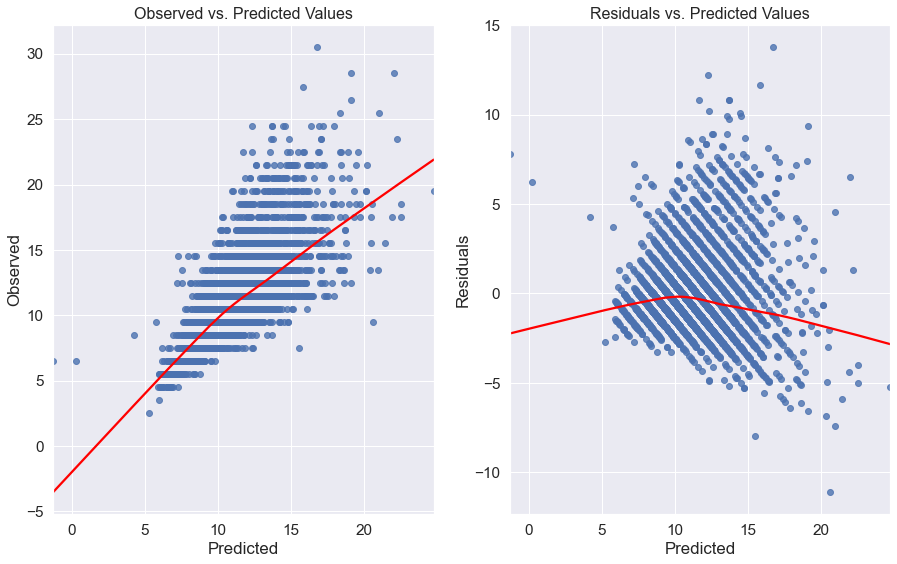

In [60]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)    

In [41]:
print(np.mean(y_pred),'\n',y_pred)

11.400124521072797 
 [10.33 11.17 11.37 ...  7.83  8.64  9.7 ]


In [42]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_quad,y,test_size=0.2, random_state = 0)

plr = LinearRegression().fit(x_train,y_train)

y_train_pred = plr.predict(x_train)
y_test_pred = plr.predict(x_test)

print(plr.score(x_test,y_test))

0.5496352825378831


In [43]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.652, MSE test data: 4.846
R2 train data: 0.938, R2 test data: 0.512


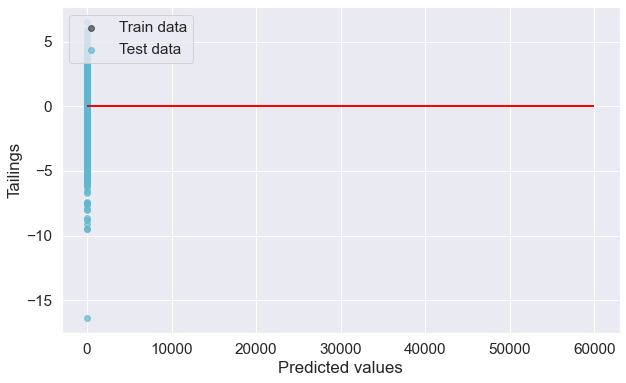

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

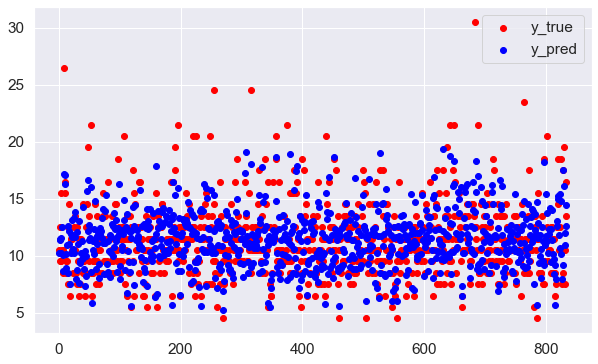

In [44]:
y_pred = forest.predict(x_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()

In [45]:
log_reg_score= cross_val_score(lr, x_train, y_train, cv=5) #We will use best parameters for modeling
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  38.55%


# ------------------------------------------------------------------------------

In [48]:
x = df['Shell weight'].values.reshape(-1,1)
y = df['Age'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('nilai koefisien=',lr.coef_)
print('nilai intersep=',lr.intercept_)

0.35103586060642433
nilai koefisien= [[14.88256955]]
nilai intersep= [7.8726943]


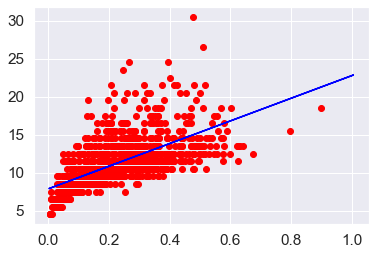

In [49]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.show()

In [50]:
x = df['Whole weight'].values.reshape(-1,1)
y = df['Age'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('nilai koefisien=',lr.coef_)
print('nilai intersep=',lr.intercept_)

0.2526182054908318
nilai koefisien= [[3.66828621]]
nilai intersep= [8.37744052]


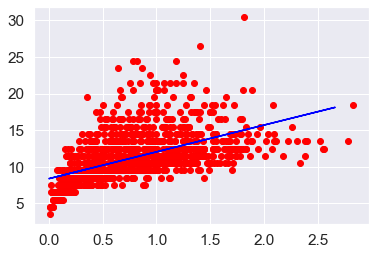

In [51]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.show()

In [52]:
x = df['Viscera weight'].values.reshape(-1,1)
y = df['Age'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('nilai koefisien=',lr.coef_)
print('nilai intersep=',lr.intercept_)

0.2219442667390621
nilai koefisien= [[15.25785992]]
nilai intersep= [8.66781255]


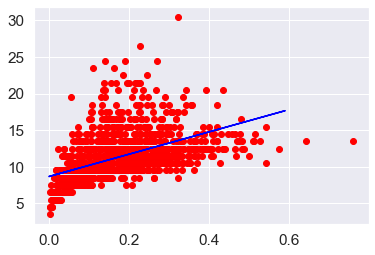

In [53]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.show()

In [54]:
x = df['Rings'].values.reshape(-1,1)
y = df['Age'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print('nilai koefisien=',lr.coef_)
print('nilai intersep=',lr.intercept_)

1.0
nilai koefisien= [[1.]]
nilai intersep= [1.5]


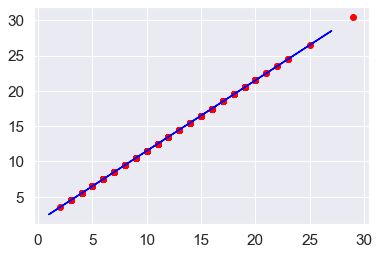

In [55]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.show()

# kesimpulan

